In [ ]:
# Recommendation System for a medial supply company

In [ ]:
import pandas as pd

df = pd.read_csv('PBL 5 recommendation data.csv', encoding='ISO-8859-1')
print(df.shape)
df.head()

(4194, 181)


<ipython-input-2-cb62cf6fea16>:3: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PBL 5 recommendation data.csv', encoding='ISO-8859-1')


,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [ ]:
df.shape

(4194, 181)

In [ ]:
df.info()
print("\nEksik değer sayısı:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB

Eksik değer sayısı:
Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64


In [ ]:
print(df.columns.tolist())

['Customers.id', 'Customers.fname', 'Customers.lname', 'Customers.company', 'Customers.create_date', 'Customers.status', 'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt', 'Customers.account_id', 'Customers.sales_rep', 'Customers.rewards', 'Customers.profile_id', 'Customers.last_modified', 'Customers.customer_type', 'Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname', 'Orders.company', 'Orders.order_number', 'Orders.reorder_id', 'Orders.external_source', 'Orders.external_id', 'Orders.currency', 'Orders.sales_rep', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.coupon_id', 'Orders.coupon_amount', 'Orders.gift_id', 'Orders.gift_amount', 'Orders.fee_name', 'Orders.fee_amount', 'Orders.discount_name', 'Orders.discount_amount', 'Orders.total', 'Orders.balance_due', 'Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.shipping_trans', 'Orders.shipping_flags', 'Orders.weight', 'Orders.tracking', 'Orders.payment_status', 'Orders.payment_date'

In [ ]:
print("\nSayısal kolonlarda istatistiksel özet:")
print(df.describe())

print("\nKategorik kolonlarda benzersiz değerler:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} benzersiz")


Sayısal kolonlarda istatistiksel özet:
       Customers.id  Customers.create_date  Customers.status  \
count   4194.000000           4.194000e+03             101.0   
mean    1796.518121           1.440971e+09               0.0   
std     1065.679090           1.887681e+07               0.0   
min        3.000000           1.386089e+09               0.0   
25%      865.250000           1.427323e+09               0.0   
50%     1747.500000           1.446412e+09               0.0   
75%     2698.750000           1.456955e+09               0.0   
max     3736.000000           1.463418e+09               0.0   

       Customers.mailing  Customers.reminders  Customers.tax_exempt  \
count        2114.000000                  0.0              5.000000   
mean            0.979659                  NaN              0.200000   
std             0.141196                  NaN              0.447214   
min             0.000000                  NaN              0.000000   
25%             1.000000    

In [ ]:
popular_by_volume = df.groupby('Order_Items.product_name')['Order_Items.qty'].sum().sort_values(ascending=False)
print("\nEn çok satılan ürünler (adet):")
print(popular_by_volume.head())


En çok satılan ürünler (adet):
Order_Items.product_name
TruTemp                                                                     500
Disposable Emergency Blanket, Gray, Not Applicable                          305
2-Ply Tissue/Poly Professional Towels, White, Not Applicable                220
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size    164
Sanitary Pads with Adhesive & Wings                                         133
Name: Order_Items.qty, dtype: int64


In [ ]:
top_company = df.groupby('Customers.company')['Orders.total'].sum().sort_values(ascending=False)
print("\nEn çok satın alma yapan şirketler:")
print(top_company.head())


En çok satın alma yapan şirketler:
Customers.company
Company59     12790.69
Company207     9502.36
Company145     8530.28
Company159     8452.78
Company130     7330.23
Name: Orders.total, dtype: float64


In [ ]:
top_company = df.groupby('Customers.company')['Orders.total'].sum().sort_values(ascending=False)
print("\nEn çok satın alma yapan şirketler:")
print(top_company.head())


En çok satın alma yapan şirketler:
Customers.company
Company59     12790.69
Company207     9502.36
Company145     8530.28
Company159     8452.78
Company130     7330.23
Name: Orders.total, dtype: float64


In [ ]:
df['Customers.company'] = df['Customers.company'].fillna('Unknown')

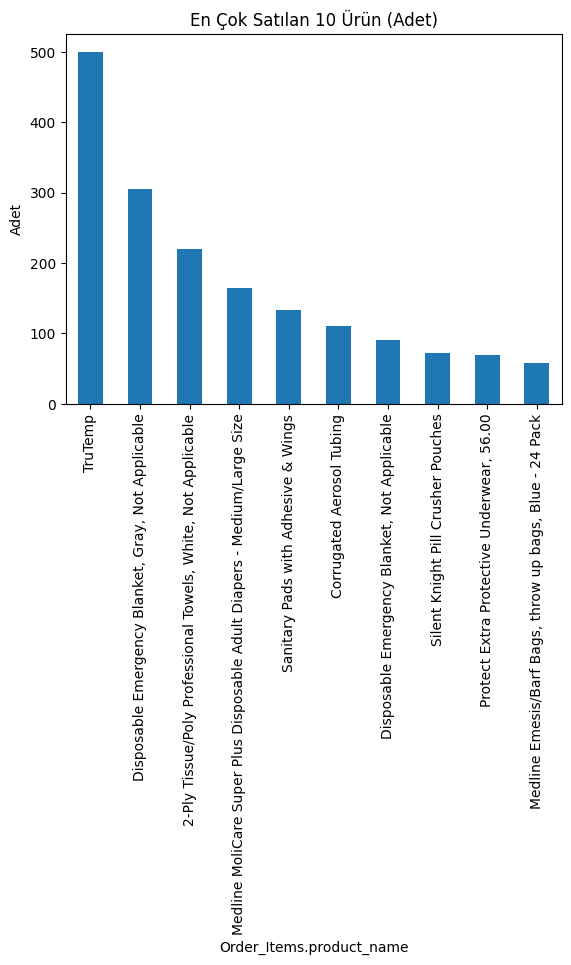

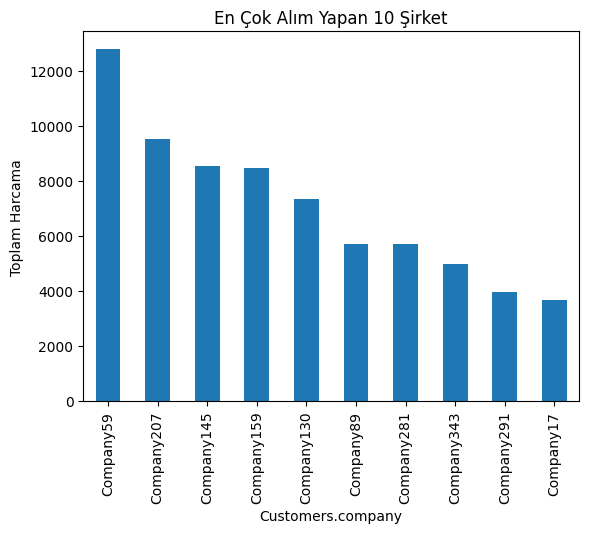

In [ ]:
import matplotlib.pyplot as plt

popular_by_volume.head(10).plot(kind='bar', title='En Çok Satılan 10 Ürün (Adet)')
plt.ylabel('Adet')
plt.show()

top_company.head(10).plot(kind='bar', title='En Çok Alım Yapan 10 Şirket')
plt.ylabel('Toplam Harcama')
plt.show()

In [ ]:
# Örnek dolgu (en önemli kolonlara göre)
df['Customers.company'] = df['Customers.company'].fillna('Unknown')
df['Products.family_id'] = df['Products.family_id'].fillna(-1)
df['Products.saved_status'] = df['Products.saved_status'].fillna(0)

In [ ]:
# En çok satılan ürün (adet bazında)
popular_by_volume = df.groupby('Order_Items.product_id')['Order_Items.qty'].sum().sort_values(ascending=False)
print(popular_by_volume.head())

# En yüksek ciro getiren ürün (toplam değer)
df['order_value'] = df['Order_Items.qty'] * df['Order_Items.price']
popular_by_value = df.groupby('Order_Items.product_id')['order_value'].sum().sort_values(ascending=False)
print(popular_by_value.head())

Order_Items.product_id
1846.0    396
2107.0    228
1672.0    220
1648.0    133
1842.0    112
Name: Order_Items.qty, dtype: int64
Order_Items.product_id
1846.0    13705.56
2107.0    12542.26
911.0      8449.00
910.0      8420.49
858.0      6818.94
Name: order_value, dtype: float64


In [ ]:
company_total = df.groupby('Customers.company')['order_value'].sum().sort_values(ascending=False)
print(company_total.head())

Customers.company
Unknown       290635.31
Company59      13186.41
Company343      5628.56
Company17       4167.15
Company281      3061.96
Name: order_value, dtype: float64


In [ ]:
def popularity_recommender(df, top_n=10):
    top_products = df.groupby('Order_Items.product_id')['Order_Items.qty'].sum().sort_values(ascending=False).head(top_n).index
    return df[df['Order_Items.product_id'].isin(top_products)][['Order_Items.product_id', 'Products.name']].drop_duplicates()

print(popularity_recommender(df))

      Order_Items.product_id  \
17                     910.0   
86                     911.0   
119                   1842.0   
146                   1862.0   
308                   2107.0   
522                   1672.0   
608                   1469.0   
846                   1846.0   
1153                   493.0   
3469                  1648.0   

                                          Products.name  
17    Aluminum Transport Chair with 12" Wheels,Blue,...  
86    Aluminum Transport Chair with 12" Wheels,Red,F...  
119                          Emesis Bags,Blue,36.000 OZ  
146                  Silent Knight Pill Crusher Pouches  
308       MoliCare Disposable Super Plus Briefs,27"-47"  
522   2-Ply Tissue/Poly Professional Towels,Not Appl...  
608   Protection Plus Super Protective Adult Underwe...  
846         Disposable Emergency Blanket,Not Applicable  
1153                          Corrugated Aerosol Tubing  
3469                Sanitary Pads with Adhesive & Wings  


In [ ]:
#!pip install scikit-surprise

In [ ]:
#!pip install numpy==1.23.5

In [ ]:
#!pip install scikit-surprise


In [ ]:
#!pip install --user scikit-surprise

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ürün açıklamalarıdan matris
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Products.long_description'].fillna(''))

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Örnek: ilk ürünle en benzer ürünler
import numpy as np
sim_scores = list(enumerate(cosine_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar = [i for i, score in sim_scores[1:6]]
print(df.iloc[top_similar][['Products.id', 'Products.name']])


      Products.id               Products.name
824        2308.0  Basic Steel Rollators,Blue
859        2312.0   Basic Steel Rollators,Red
1117       2309.0  Basic Steel Rollators,Blue
1450       2309.0  Basic Steel Rollators,Blue
1551       2308.0  Basic Steel Rollators,Blue
